In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initializing the variables

x = 0.5      # Length of the rod in m
k = 41       # Thermal conductivity in W/mK
q = 10E5     # Volumetric rate of heat generation in W/m^3
nx = 10      # No. of divisions
dx = x/(nx-1) # Each division length
print(dx)

0.05555555555555555


In [3]:
# Forming the grid

xarr = np.linspace(0,x,nx)     # An array of the x-values
T = np.zeros(nx)               # An array of the initial temperatures
print(xarr, T)

[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# Applying the boundary conditions

T[0] = 273     # Applying the left boundary condition
T[-1] = 283   # Applying the right boundary condition
print(T)

[273.   0.   0.   0.   0.   0.   0.   0.   0. 283.]


### Discretizing the equation 

The given equation is $$\frac{d^2T}{dx^2} + \frac{\dot{q}}{k} = 0$$

Discretizing this equation using the finite difference method gives: $$ \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2} = \frac{-\dot{q}}{k} $$

Which gives: $$ T_i = \frac{T_{i+1} + T_{i-1} + \frac{\dot{q}\Delta x^2}{k}}{2}$$

### Solving the problem using Gauss-Seidel Method 

In [5]:
# Defining the function for Gauss-Seidel method

def GaussSeidel(u, err, nt):
    for t in range(nt):
        un = u.copy()
        u[1:-1] = 0.5*(u[2:] + u[0:-2] + q*dx**2/k)
            
        plt.plot(xarr, u)
            
        if (abs(u-un)<err).all():
            print("Pre-final temperature distribution: ", un)
            print("\n")
            print("Final iteration %d"% t)
            print("Temperature distribution: ", u)
            break    

Pre-final temperature distribution:  [ 273.          575.22466497  802.17086757  953.83866918 1030.22811289
 1031.33922457  957.17200202  807.72642349  583.00244255  283.        ]


Final iteration 216
Temperature distribution:  [ 273.          575.22469907  802.17093236  953.83875551 1030.22821216
 1031.33932274  957.17208931  807.72648757  583.00247703  283.        ]


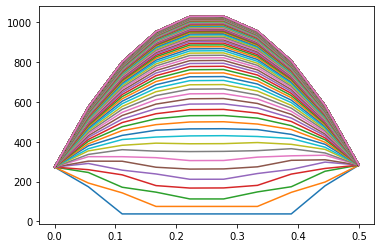

In [6]:
GaussSeidel(T, 10E-5, 1000)